# The data
The dataset is open sourced data from Kaggle. \
data sample: https://www.kaggle.com/datasets/patrickzel/flight-delay-and-cancellation-dataset-2019-2023?resource=download&select=flights_sample_3m.csv \
full data: https://www.kaggle.com/code/alperenkaran/visualization-of-flight-delays/input

In [33]:
import pandas as pd
import numpy as np

import seaborn as sns

In [34]:
sample_data = True
if sample_data == True:
    df_flt = pd.read_csv('./data/flight/flights_sample_3m.csv',encoding="utf-8")
else:
    data_list = []
    for year in range(2019, 2024):
        df_year = pd.read_csv(f'./data/flight/{year}.csv',encoding="utf-8")
        data_list.append(df_year)
        del df_year
    df_flt = pd.concat(data_list).reset_index(drop = True)

## Check missing values and duplications

In [35]:
# check missing values
miss_ser = df_flt.isna().sum()

miss_val = pd.DataFrame({
    'Missing Values':miss_ser.values,
    'Missing %age':round((miss_ser/df_flt.shape[0])*100,4).astype(str) + '%',
    'Datatype':df_flt.dtypes
})

miss_val.sort_values(by='Missing %age', ascending=False)

,Missing Values,Missing %age,Datatype
CANCELLATION_CODE,2920860,97.362%,object
DELAY_DUE_LATE_AIRCRAFT,2466137,82.2046%,float64
DELAY_DUE_SECURITY,2466137,82.2046%,float64
DELAY_DUE_NAS,2466137,82.2046%,float64
DELAY_DUE_WEATHER,2466137,82.2046%,float64
DELAY_DUE_CARRIER,2466137,82.2046%,float64
AIR_TIME,86198,2.8733%,float64
ELAPSED_TIME,86198,2.8733%,float64
ARR_DELAY,86198,2.8733%,float64
WHEELS_ON,79944,2.6648%,float64


In [36]:
# check duplicates
len(df_flt) == len(df_flt.drop_duplicates())

True

In [37]:
def preprocess(df):
    orig_count = df.shape[0]
    # remove cancelled flights and diverted flights
    df = df.loc[(df["CANCELLED"]==0)&(df["DIVERTED"]==0)]
    # remove records with important feature missing
    df = df.dropna(subset = ["AIR_TIME","ARR_TIME","DEP_TIME"])
    print(f"{(100*(orig_count - df.shape[0])/orig_count):.2f} % of data are removed.")
    
    # convert fl_date to date 
    if df["FL_DATE"].dtype == "object":
        df["FL_DATE"] = pd.to_datetime(df["FL_DATE"], format = "%Y-%m-%d")
    
    return df

In [38]:
df_flt_clean = preprocess(df_flt)

2.87 % of data are removed.


## Add Additional features (month, day of week, departure hour)

In [ ]:
def add_additional_features(df):
    df["flt_month"] = df["FL_DATE"].dt.month
    df["flt_day_of_week"] = df["FL_DATE"].dt.dayofweek
    df["schd_dep_hour"] = df["CRS_DEP_TIME"].astype("str").str[:-2]
    df.loc[df["schd_dep_hour"]=="", "schd_dep_hour"] = "0"
    return df

In [40]:
df_flt_clean = add_additional_features(df_flt_clean)

## Check distribution of features

In [24]:
def check_box_plot(df, col_to_check, cat_col=None): 
    if col_to_check not in df.select_dtypes(include=np.number).columns.tolist():\
        print("col_to_check should be numeric")
    else:
        if cat_col == None:
            sns.boxplot(data=df, y=col_to_check)
        elif df[cat_col].dtype == "object":
            sns.boxplot(data=df, x= cat_col, y=col_to_check)
        else:
            print("cat_col should be a categorical column")


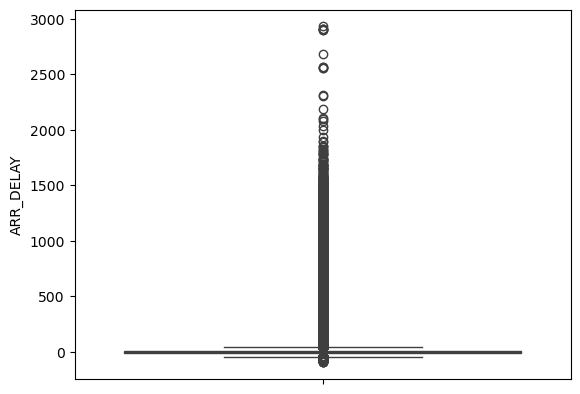

In [25]:
check_box_plot(df_flt_clean, "ARR_DELAY")

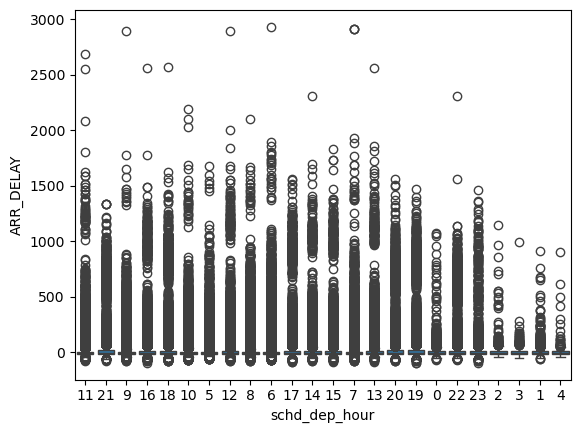

In [50]:
check_box_plot(df_flt_clean, "ARR_DELAY", "schd_dep_hour")